In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pg
from systole.detection import oxi_peaks, rr_artefacts

sns.set_context('talk')

Import summary statistics from Bayesian psychometric fits.

In [5]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
bayesPsycho_df = pd.read_csv(path + '/data/bayesianPsychophysic.txt')

In [10]:
bayesPsycho_df[(bayesPsycho_df.Condition=='Extero') & (bayesPsycho_df.Threshold < -10)]

,Unnamed: 0,Subject,Condition,Threshold,Slope,BayesianThreshold,BayesianSlope
21,21,sub_0030,Extero,-10.448430,13.335163,-4.495,8.359
86,86,sub_0092,Extero,-10.952678,13.499537,-1.998,9.539
296,296,sub_0206,Extero,-10.959491,12.014786,-4.133,6.171
426,426,sub_0067,Extero,-22.736688,18.843883,-16.393,19.682


# Correlation between psi and Bayesian fit

## Threshold

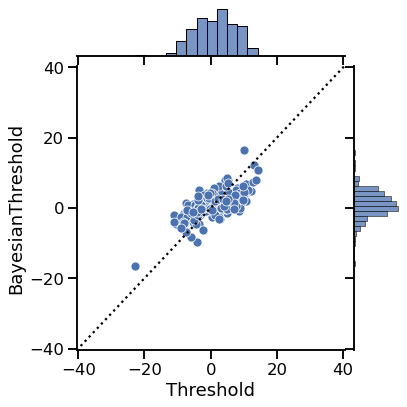

In [11]:
g = sns.jointplot(data=bayesPsycho_df[bayesPsycho_df.Condition=='Extero'],
                  x='Threshold', y='BayesianThreshold', xlim=(-40.5, 40.5),
                  ylim=(-40.5, 40.5), color='#4c72b0')
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    
plt.savefig(path + '/figures/thresholdExtero.svg', dpi=300)

In [20]:
pg.corr(x=group_df[bayesPsycho_df.Condition=='Extero'].Threshold,
        y=group_df[bayesPsycho_df.Condition=='Extero'].BayesianThreshold, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,216,0.675205,"[0.6, 0.74]",0.455902,0.450793,4.186557e-30,1.0


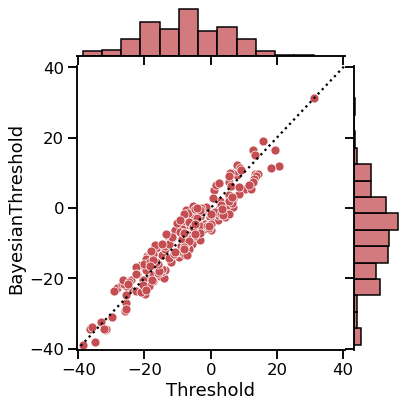

In [13]:
g = sns.jointplot(data=bayesPsycho_df[bayesPsycho_df.Condition=='Intero'], x='Threshold',
                  y='BayesianThreshold', xlim=(-40.5, 40.5), ylim=(-40.5, 40.5), color='#c44e52')
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
plt.savefig(path + '/thresholdIntero.svg', dpi=300)

In [19]:
pg.corr(x=group_df[bayesPsycho_df.Condition=='Intero'].Threshold,
        y=group_df[bayesPsycho_df.Condition=='Intero'].BayesianThreshold, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,217,0.948988,"[0.93, 0.96]",0.900577,0.899648,9.714394e-110,1.0


## Slope